<a href="https://colab.research.google.com/github/Mifekmk/Store-Sales---Time-Series-Forecasting/blob/main/Time_Series_Forecasting_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip '/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/Store Sales - Time Series Forecasting/train.csv.zip'
#!unzip '/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/Store Sales - Time Series Forecasting/transactions.csv.zip'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 참고 사항
# 공공 부문의 임금은 15일과 마지막 날 2주에 한 번씩 지급
# 슈퍼마켓은 영향을 받을 수 밖에 없음

# 2016년 4월 16일 에콰도르에서 규모 7.8의 지진 발생
# 사람들은 지진 발생 후 몇 주 동안 슈퍼마켓 판매에 큰 영향을 미친 물과 다른 필요한 제품을 기부하는 구호 활동에 모임

In [ ]:
train = pd.read_csv('/content/train.csv')
transactions = pd.read_csv('/content/transactions.csv')
test = pd.read_csv('/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/Store Sales - Time Series Forecasting/test.csv')
stores = pd.read_csv('/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/Store Sales - Time Series Forecasting/stores.csv', index_col='store_nbr')
submission = pd.read_csv('/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/Store Sales - Time Series Forecasting/sample_submission.csv')
oil = pd.read_csv('/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/Store Sales - Time Series Forecasting/oil.csv', index_col='date')
holiday = pd.read_csv('/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/Store Sales - Time Series Forecasting/holidays_events.csv')

# Train

In [ ]:
print(train.shape)
train.head()

(3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
print(holiday.shape)
holiday.head()

(350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
# 모든 컬럼에 대해서 
for col in train.columns:
  n_unique = len(train[col].unique()) # 고유값 개수
  print( col, n_unique ) # 컬럼명과 고유값 개수 출력

id 3000888
date 1684
store_nbr 54
family 33
sales 379610
onpromotion 362


In [ ]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [ ]:
train['date'].unique()
# train 데이터의 날짜는 2013-01-01 ~ 2017-08-15 까지임을 알 수 있음

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-08-13',
       '2017-08-14', '2017-08-15'], dtype=object)

In [ ]:
train['sales'].describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

In [ ]:
import datetime

train['year'] = pd.DatetimeIndex(train['date']).year
train['month'] = pd.DatetimeIndex(train['date']).month
train['day'] = pd.DatetimeIndex(train['date']).day
train['day_name'] = pd.DatetimeIndex(train['date']).strftime('%A')

train.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,Tuesday


Text(0.5, 1.0, 'Sales Average by Day of Month')

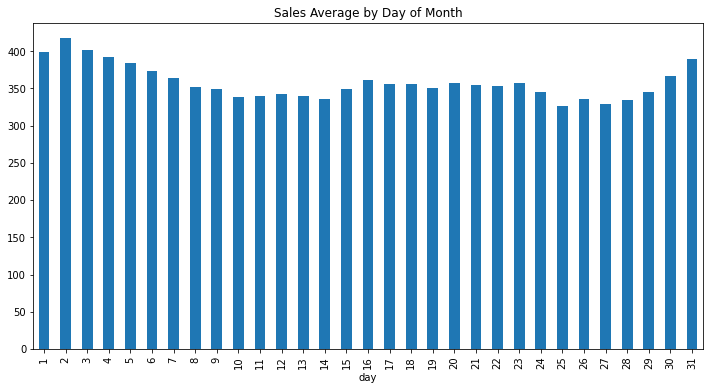

In [ ]:
plt.figure(figsize=(12,6))
train.groupby('day').sales.mean().plot(kind='bar')
plt.title('Sales Average by Day of Month')

Text(0.5, 1.0, 'Sales Sum by Day of Month')

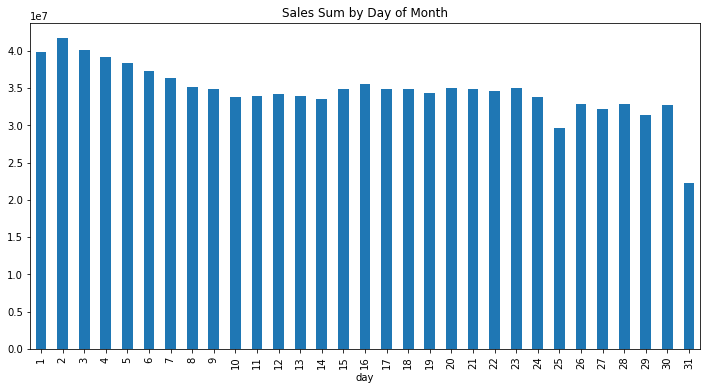

In [ ]:
plt.figure(figsize=(12,6))
train.groupby('day').sales.sum().plot(kind='bar')
plt.title('Sales Sum by Day of Month')

Text(0.5, 1.0, 'Average Sales by Day of week')

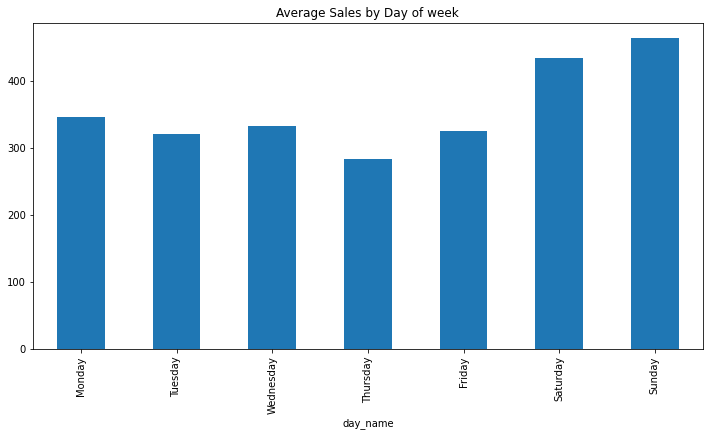

In [ ]:
plt.figure(figsize=(12,6))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
train.groupby('day_name').sales.mean().reindex(index=order).plot(kind='bar')
plt.title('Average Sales by Day of week')

Text(0.5, 1.0, 'Sales Ranking by Store')

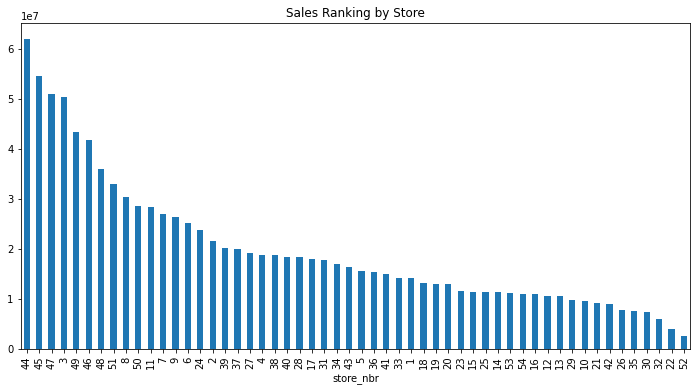

In [ ]:
plt.figure(figsize=(12,6))
train.groupby('store_nbr').sales.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Sales Ranking by Store')

Text(0.5, 1.0, 'Promotion Items Ranking by Store')

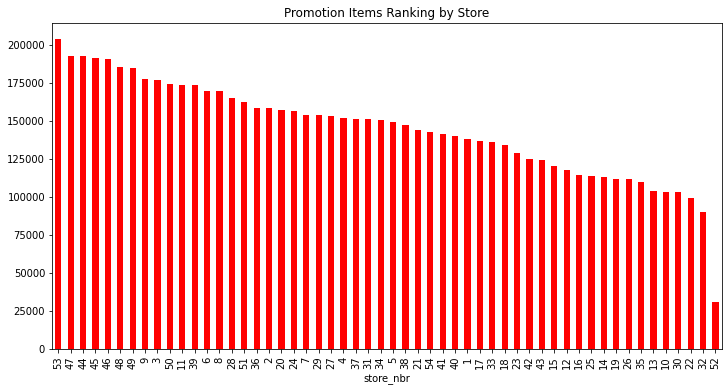

In [ ]:
plt.figure(figsize=(12,6))
train.groupby('store_nbr').onpromotion.sum().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('Promotion Items Ranking by Store')

- 매출 순위 별로 나열하여 상위 5개(44, 45, 47, 3, 49)와 하위 5개(52,22,32,30,35)를 프로모션 횟수 데이터를 이용하여 인사이트를 찾아 보았습니다.
- 프로모션 횟수 상위 5개(53, 47, 44, 45, 46)과 하위 5개(52, 32, 22, 30, 10)으로 확인하였습니다.
- 어느정도 유사성은 있어 보이나 전혀 관계가 없는 데이터들도 상당 수 발견 되었습니다.( 상관관계 : 0.4)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   year         int64  
 7   month        int64  
 8   day          int64  
 9   day_name     object 
dtypes: float64(1), int64(6), object(3)
memory usage: 228.9+ MB


In [ ]:
print('Train: ',min(train.date),max(train.date))
print('\n')
print('Test: ',min(test.date),max(test.date))

Train:  2013-01-01 2017-08-15


Test:  2017-08-16 2017-08-31


In [ ]:
train['store_nbr'].unique()
# store_nbr은 제품이 판매되는 스토어를 식별

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [ ]:
train['family'].unique()
# family는 판매된 제품 유형을 식별

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

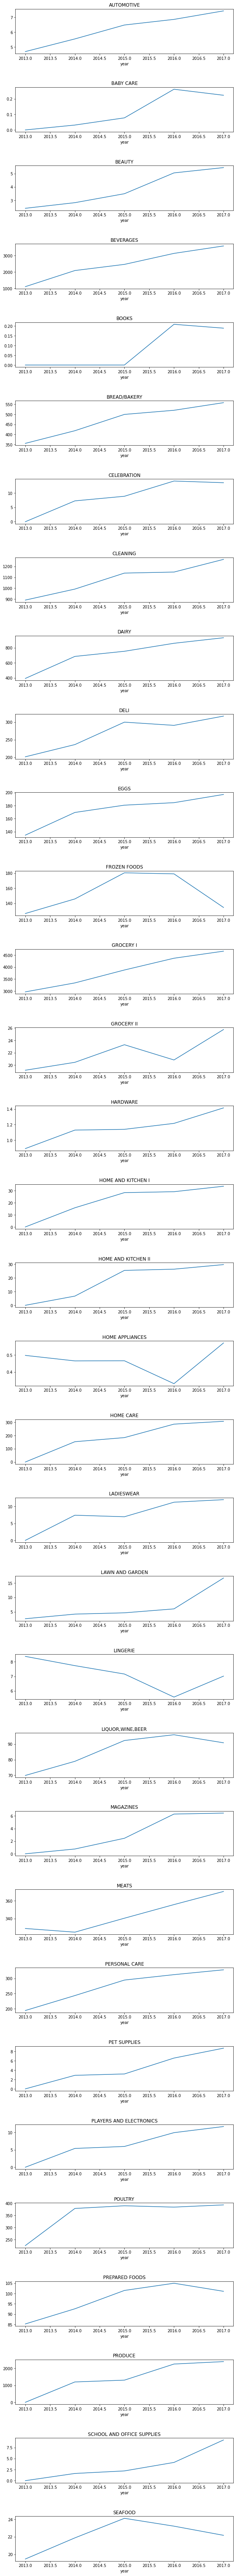

In [78]:
fig= plt.figure(figsize=(10,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(train.family.unique()):
    ax = fig.add_subplot(33,1,i+1)
    train.query('family==@product').groupby(['year']).sales.mean().plot()
    plt.title(product);

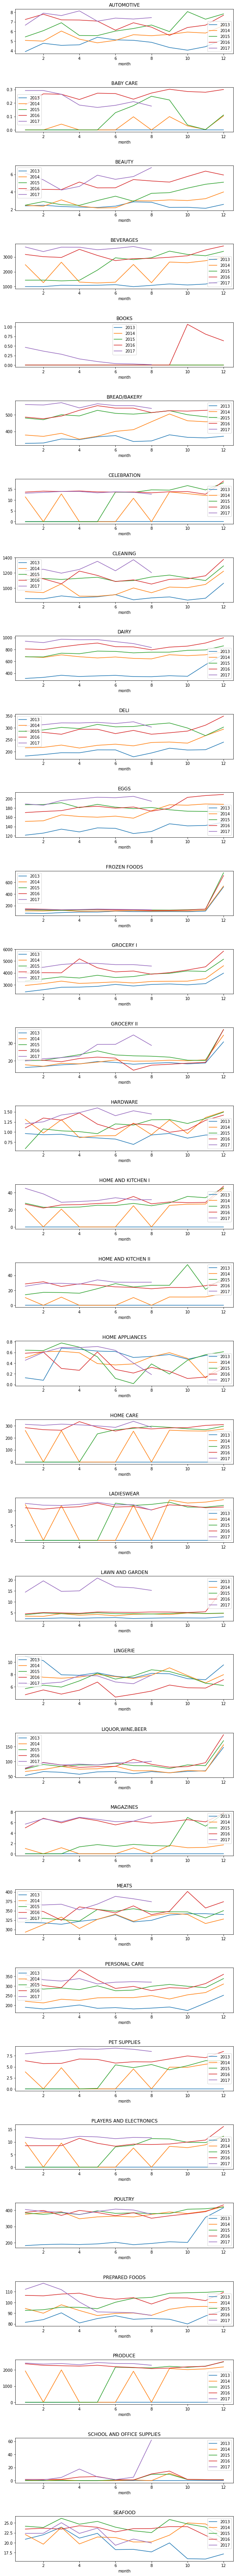

In [ ]:
fig= plt.figure(figsize=(10,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(train.family.unique()):
    ax = fig.add_subplot(33,1,i+1)
    select = train.query('family==@product')
    for year in [2013,2014,2015,2016,2017]: 
        select.query('year==@year').groupby('month').sales.mean().plot(ax=ax,label=year)
    plt.title(product)
    ax.legend();

In [ ]:
print('train')
print(train.isna().sum())
print('\n')
print('test')
print(test.isna().sum())

train
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
day            0
day_name       0
dtype: int64


test
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [ ]:
train['sales'].unique()
# sales는 지정된 날짜에 특정 상점에서 제품군에 대한 총 매출
# 분수 값은 제품을 분수 단위로 판매하기에 가능 ex) cheeses 1.5kg

array([0.000000e+00, 2.000000e+00, 8.100000e+02, ..., 4.381330e+02,
       1.545530e+02, 2.419729e+03])

In [ ]:
train['onpromotion'].unique()
# 지정된 날짜에 스토어에서 프로모션을 수행하던 제품군의 총 항목 수를 제공

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

Text(0.5, 1.0, 'Promotion and Sales Relationship')

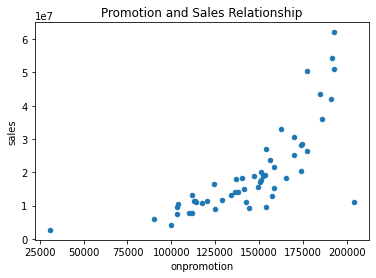

In [ ]:
train.groupby('store_nbr')[['onpromotion','sales']].sum().plot.scatter('onpromotion','sales')
plt.title('Promotion and Sales Relationship')

# Test

In [ ]:
test['year'] = pd.DatetimeIndex(test['date']).year
test['month'] = pd.DatetimeIndex(test['date']).month
test['day'] = pd.DatetimeIndex(test['date']).day
test['dat_name'] = pd.DatetimeIndex(test['date']).strftime('%A')

test.head()

,id,date,store_nbr,family,onpromotion,year,month,day,dat_name
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,Wednesday
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,Wednesday
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,Wednesday
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,Wednesday
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,Wednesday


In [ ]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
year           0
month          0
day            0
dat_name       0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
 5   year         28512 non-null  int64 
 6   month        28512 non-null  int64 
 7   day          28512 non-null  int64 
 8   dat_name     28512 non-null  object
dtypes: int64(6), object(3)
memory usage: 2.0+ MB


In [ ]:
test['date'].unique()

array(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
       '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
       '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
      dtype=object)

In [ ]:
test['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [ ]:
test['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
test['onpromotion'].unique()

array([  0,   2,  20,  12,  25,  45,  18,   1,  64,   6,  10,  16,   5,
         9, 256,  14,  43,  15,  30, 106,  96,  19, 230,  52,  35, 145,
       102,   4,   3,   8, 163,  38,  17,  29, 115,  87, 219,  33, 107,
        90, 244,  31, 114,  88, 223,  32, 105, 208,  34, 108,  97, 211,
       139,  91, 177,  40, 161,  21, 156,  39,  28, 116,  89, 220,  23,
        22,  41,  65,  11, 255, 150,  92, 178,  13,  46, 148,  98, 170,
        37, 122, 203,  24,  70, 253,  63, 254,  44,  42, 252,  47, 151,
       101, 175,  36, 152, 104, 168,  60, 110,  93, 205, 141, 172,  94,
       225, 126,  95, 197, 138, 212, 142,  99, 173,  26,  57,  51, 155,
        61, 129, 182,  62, 146, 159,  56,  59, 154, 158,   7,  53,  27,
        68,  66,  69,  49,  50,  48,  55,  54,  58,  74,  72,  78,  77,
        73,  84,  76,  80,  67,  79, 133,  86, 144, 125, 137, 140, 160,
       119, 127, 128,  83,  81,  82, 118, 124, 180, 210, 131, 228, 112,
       135, 186, 202, 237, 224, 218, 171, 206, 191, 229,  71,  8

In [ ]:
holiday.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [ ]:
holiday.query('transferred==True')

# transferred day is not celebrated
holiday = holiday.query('transferred==False') # .query는 데이터에 부합하는 데이터를 추출할 때 많이 사용
holiday.description = holiday.description.str.replace('Traslado','')

# national
national = holiday.query('locale=="National"')
day_off = national.query('type!="Work Day" or type!="Event"').set_index('date')['description'].to_dict()

train['date_str'] = train.date.astype(str)
test['date_str'] = test.date.astype(str)

train['national_holiday'] = [1 if a in day_off else 0 for a in train.date_str]
test['national_holiday'] = [1 if a in day_off else 0 for a in test.date_str]

work_day = national.query('type=="Work Day"').set_index('date')['description'].to_dict()
train['national_workday'] = [1 if a in work_day else 0 for a in train.date_str]
test['national_workday'] = [1 if a in work_day else 0 for a in test.date_str]

# weekend
train['weekend'] = [1 if a>=5 else 0 for a in train.day]
test['weekend'] = [1 if a>=5 else 0 for a in test.day]




print(holiday.shape)
holiday.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(338, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'day_name', 'date_str', 'national_holiday',
       'national_workday', 'weekend'],
      dtype='object')

# Oil

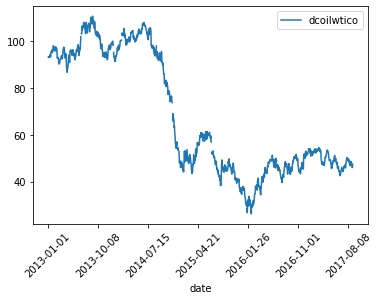

In [ ]:
oil.plot();
plt.xticks(rotation=45);

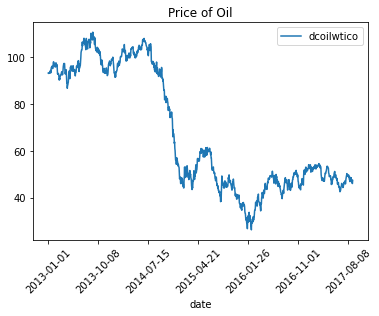

In [79]:
#filling missing data
oil = oil.interpolate(method='linear')
#the first row is still missing the value
oil.iloc[0] = oil.iloc[1]
oil.plot();
plt.title('Price of Oil')
plt.xticks(rotation=45);

# stores

- 매출 순위 별로 나열하여 상위 5개(44, 45, 47, 3, 49)와 하위 5개(52,22,32,30,35)를 프로모션 횟수 데이터를 이용하여 인사이트를 찾아 보았습니다.
- 프로모션 횟수 상위 5개(53, 47, 44, 45, 46)과 하위 5개(52, 32, 22, 30, 10)으로 확인하였습니다.
- 어느정도 유사성은 있어 보이나 전혀 관계가 없는 데이터들도 상당 수 발견 되었습니다.( 상관관계 : 0.4)

- Quito : 에콰도르 수도 (인구가 제일 많음)
- Santo Domingo : 에콰도르에서 4번째로 인구가 많은 도시 (약 460,000 명), 중요한 상업 및 산업 중심지, 수도 포함 다른 도시들을 연결하는 중요한 지점
- Cayambe : 에콰도르 고지대에 있는 농업 서비스 도시 (약 39,028명), 화산 기슭에 놓여있음. 주로 자급자족 농업, 낙농업 및 목재 조달에 관련된 토착민 구성. Pichincha 지방에서 3번째로 큰 도시 (치즈, 꽃, 카얌베(비스킷) 유명)
- Latacunga	: 고원도시(약 98,355명), 농업, 화초 재배 및 상업에 의존. 지역 화산 활동으로 인해 부석 퇴적물과 천연 탄산수 존재
- Riobamba : 중요한 지역 교통 중심지이자 에콰도르를 가로지르는 범아메리카 고속도로 정류장, 에콰도르 시에라 지역 중부에서 가장 큰 도시 중 하나
- Ibarra : 국가 북부에서 가장 인구가 많은 지역, 무역, 관광, 교육 서비스, 농업, 부동산 등 매우 중요한 도시
- Guaranda : 

In [ ]:
print(stores.shape)
stores

(54, 4)


,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [ ]:
stores['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [ ]:
stores['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [ ]:
stores['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [ ]:
stores['cluster'].unique()

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17])

In [ ]:
train_df = pd.merge(train,stores,how='left',on='store_nbr')
test_df = pd.merge(test,stores,how='left',on='store_nbr')

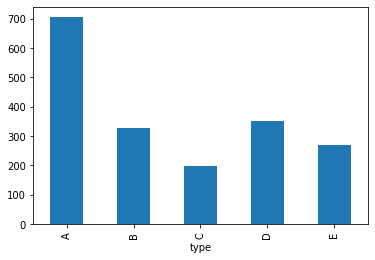

In [ ]:
train_df.groupby(['type']).sales.mean().plot(kind='bar');

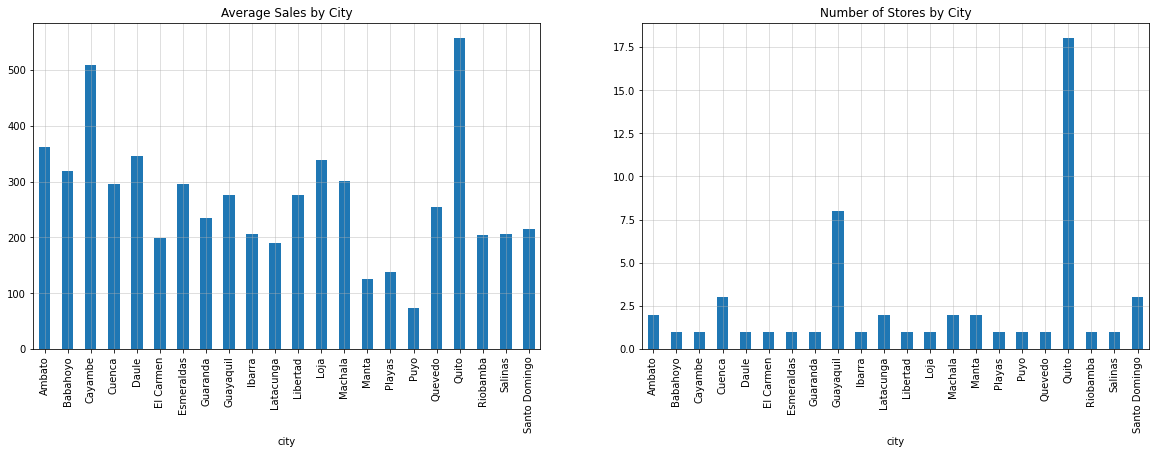

In [ ]:
plt.figure(figsize=(20,6))

ax1 = plt.subplot(1,2,1)
train_df.groupby(['city']).sales.mean().plot(kind='bar')
plt.title('Average Sales by City')
plt.grid(True, alpha=0.5)
ax2 = plt.subplot(1,2,2)
train_df.groupby(['city'])['store_nbr'].nunique().plot(kind='bar')
plt.title('Number of Stores by City')
plt.grid(True, alpha=0.5)

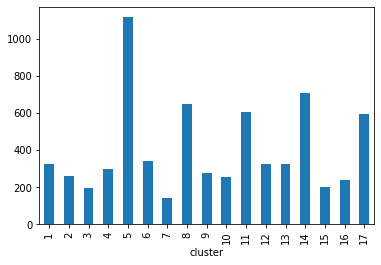

In [ ]:
train_df.groupby(['cluster']).sales.mean().plot(kind='bar')

In [ ]:
train_df.groupby(['cluster','store_nbr','city','type']).nunique()

id  date  family  sales  onpromotion  \
cluster store_nbr city          type                                            
1       24        Guayaquil     D     55572  1684      33  15182          160   
        25        Salinas       D     55572  1684      33  12023          149   
        27        Daule         D     55572  1684      33  15260          159   
2       37        Cuenca        D     55572  1684      33  15065          173   
        42        Cuenca        D     55572  1684      33   7676          157   
3       16        Santo Domingo C     55572  1684      33   7431          116   
        30        Guayaquil     C     55572  1684      33   6665          108   
        32        Guayaquil     C     55572  1684      33   6402           97   
        33        Quevedo       C     55572  1684      33   8091          130   
        35        Playas        C     55572  1684      33   6851          107   
        40        Machala       C     55572  1684      33   8998          127   
        54        El Carmen     C     55572  1684      33   7546          180   
4       5         Santo Domingo D     55572  1684      33  14753          165   
        38        Loja          D     55572  1684      33  15025          169   
        41        Machala       D     55572  1684      33  14040          165   
5       44        Quito         A     55572  1684      33  18368          199   
6       9         Quito         B     55572  1684      33  13939          155   
        11        Cayambe       B     55572  1684      33  12111          152   
        20        Quito         B     55572  1684      33   8613          154   
        21        Santo Domingo B     55572  1684      33   6698          147   
        34        Guayaquil     B     55572  1684      33  11151          139   
        39        Cuenca        B     55572  1684      33  13105          170   
7       14        Riobamba      C     55572  1684      33   7562          115   
        22        Puyo          C     55572  1684      33   3970          114   
8       3         Quito         D     55572  1684      33  17801          193   
        7         Quito         D     55572  1684      33  15462          180   
        8         Quito         D     55572  1684      33  16181          179   
9       4         Quito         D     55572  1684      33  15031          168   
        23        Ambato        D     55572  1684      33  13308          159   
10      26        Guayaquil     D     55572  1684      33  10077          126   
        28        Guayaquil     E     55572  1684      33  12604          148   
        29        Guayaquil     E     55572  1684      33   7463          155   
        31        Babahoyo      B     55572  1684      33  11503          140   
        36        Libertad      E     55572  1684      33  11242          153   
        43        Esmeraldas    E     55572  1684      33   9372          135   
11      45        Quito         A     55572  1684      33  18217          199   
        49        Quito         A     55572  1684      33  17364          194   
        52        Manta         A     55572  1684      33   1681          103   
12      17        Quito         C     55572  1684      33   8313          137   
13      1         Quito         D     55572  1684      33  13668          155   
        2         Quito         D     55572  1684      33  14579          174   
        6         Quito         D     55572  1684      33  15947          177   
        53        Manta         D     55572  1684      33  10030          239   
14      46        Quito         A     55572  1684      33  17221          189   
        47        Quito         A     55572  1684      33  18004          200   
        48        Quito         A     55572  1684      33  16930          191   
        50        Ambato        A     55572  1684      33  16358          183   
15      10        Quito         C     55572  1684      33   7330        

# holiday_event

In [ ]:
print(holiday.shape)
holiday

(338, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
holiday.date.unique()

array(['2012-03-02', '2012-04-01', '2012-04-12', '2012-04-14',
       '2012-04-21', '2012-05-12', '2012-06-23', '2012-06-25',
       '2012-07-03', '2012-07-23', '2012-08-05', '2012-08-10',
       '2012-08-15', '2012-08-24', '2012-09-28', '2012-10-07',
       '2012-10-12', '2012-11-02', '2012-11-03', '2012-11-06',
       '2012-11-07', '2012-11-10', '2012-11-11', '2012-11-12',
       '2012-12-05', '2012-12-06', '2012-12-08', '2012-12-21',
       '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
       '2012-12-26', '2012-12-31', '2013-01-01', '2013-01-05',
       '2013-01-12', '2013-02-11', '2013-02-12', '2013-03-02',
       '2013-04-01', '2013-04-12', '2013-04-14', '2013-04-21',
       '2013-04-29', '2013-05-01', '2013-05-11', '2013-05-12',
       '2013-05-24', '2013-06-23', '2013-06-25', '2013-07-03',
       '2013-07-23', '2013-07-24', '2013-07-25', '2013-08-05',
       '2013-08-10', '2013-08-15', '2013-08-24', '2013-09-28',
       '2013-10-07', '2013-10-11', '2013-11-02', '2013-

In [ ]:
holiday.type.unique()
# Bridge는 휴일에 추가된 추가 날짜. (ex. 긴 주말 동안 휴식을 연장하기위해)
# Additional은 일반적으로 크리스마스(크리스마스 이브를 공휴일로 만드는 것) 즈음에 발생한 것처럼
# 정기 달력 휴일.

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [ ]:
train_df = pd.merge(train,holiday,how='left',on='date')
test_df = pd.merge(test,holiday,how='left',on='date')

Text(0.5, 1.0, 'Sales of mean in holiday')

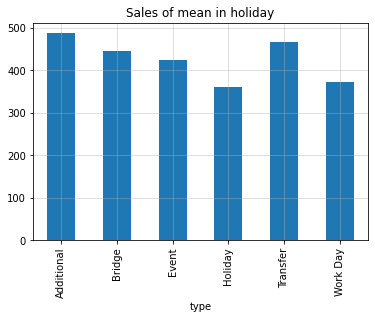

In [ ]:
train_df.groupby(['type']).sales.mean().plot(kind='bar')
plt.grid(True, alpha=0.5)
plt.title('Sales of mean in holiday')

- 국가 공휴일에 매출액의 평균이 가장 높았고, 주말의 매출액이 가장 낮았습니다.
- transfer 매출액의 평균 또한 높게 나왔습니다.

In [ ]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'day_name', 'date_str', 'national_holiday',
       'national_workday', 'weekend', 'type', 'locale', 'locale_name',
       'description', 'transferred'],
      dtype='object')

In [ ]:
train_df.groupby(['type','date',]).nunique()

id  store_nbr  family  sales  onpromotion  year  \
type       date                                                            
Additional 2013-05-11  1782         54      33    612            1     1   
           2013-07-24  1782         54      33    544            1     1   
           2013-12-05  1782         54      33    566            1     1   
           2013-12-21  1782         54      33    620            1     1   
           2013-12-22  1782         54      33    596            1     1   
...                     ...        ...     ...    ...          ...   ...   
Work Day   2013-01-05  1782         54      33    575            1     1   
           2013-01-12  1782         54      33    565            1     1   
           2014-12-20  1782         54      33    739           24     1   
           2015-01-10  1782         54      33    634           17     1   
           2016-11-12  1782         54      33    764           91     1   

                       month  day  day_name  date_str  national_holiday  \
type       date                                                           
Additional 2013-05-11      1    1         1         1                 1   
           2013-07-24      1    1         1         1                 1   
           2013-12-05      1    1         1         1                 1   
           2013-12-21      1    1         1         1                 1   
           2013-12-22      1    1         1         1                 1   
...                      ...  ...       ...       ...               ...   
Work Day   2013-01-05      1    1         1         1                 1   
           2013-01-12      1    1         1         1                 1   
           2014-12-20      1    1         1         1                 1   
           2015-01-10      1    1         1         1                 1   
           2016-11-12      1    1         1         1                 1   

                       national_workday  weekend  locale  locale_name  \
type       date                                                         
Additional 2013-05-11                 1        1       1            1   
           2013-07-24                 1        1       1            1   
           2013-12-05                 1        1       1            1   
           2013-12-21                 1        1       1            1   
           2013-12-22                 1        1       1            1   
...                                 ...      ...     ...          ...   
Work Day   2013-01-05                 1        1       1            1   
           2013-01-12                 1        1       1            1   
           2014-12-20                 1        1       1            1   
           2015-01-10                 1        1       1            1   
           2016-11-12                 1        1       1            1   

                       description  transferred  
type       date                                  
Additional 2013-05-11            1            1  
           2013-07-24            1            1  
           2013-12-05            1            1  
           2013-12-21            1            1  
           2013-12-22            1            1  
...                            ...          ...  
Work Day   2013-01-05            1            1  
           2013-01-12            1            1  
           2014-12-20            1            1  
           2015-01-10            1            1  
           2016-11-12            1            1  

[256 rows x 17 columns]

# transactions

In [ ]:
print(transactions.shape)
transactions.head()

(83488, 3)


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions.groupby(['store_nbr',]).nunique()

,date,transactions
store_nbr,,
1,1676,719
2,1677,605
3,1676,958
4,1676,638
5,1677,643
6,1676,749
7,1675,646
8,1676,749
9,1676,852


In [ ]:
import datetime

transactions['year'] = pd.DatetimeIndex(transactions['date']).year
transactions['month'] = pd.DatetimeIndex(transactions['date']).month
transactions['day'] = pd.DatetimeIndex(transactions['date']).day
transactions['day_name'] = pd.DatetimeIndex(transactions['date']).strftime('%A')
transactions.head()

,date,store_nbr,transactions,year,month,day,day_name
0,2013-01-01,25,770,2013,1,1,Tuesday
1,2013-01-02,1,2111,2013,1,2,Wednesday
2,2013-01-02,2,2358,2013,1,2,Wednesday
3,2013-01-02,3,3487,2013,1,2,Wednesday
4,2013-01-02,4,1922,2013,1,2,Wednesday


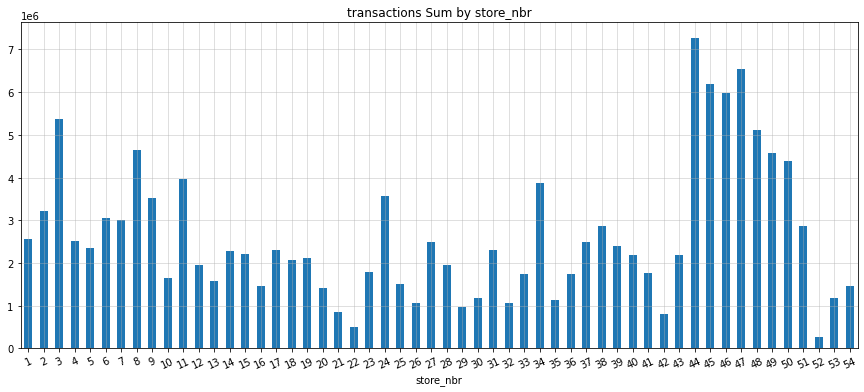

In [ ]:
plt.figure(figsize=(15,6))
transactions.groupby('store_nbr').transactions.sum().plot(kind='bar')
plt.title('transactions Sum by store_nbr')
plt.xticks(rotation=25)
plt.grid(True, alpha=0.5)
plt.show()

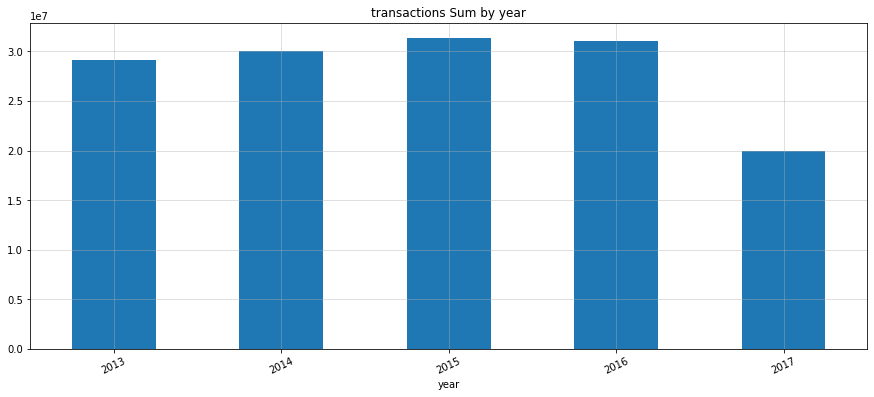

In [ ]:
plt.figure(figsize=(15,6))
transactions.groupby('year').transactions.sum().plot(kind='bar')
plt.title('transactions Sum by year')
plt.xticks(rotation=25)
plt.grid(True, alpha=0.5)
plt.show()

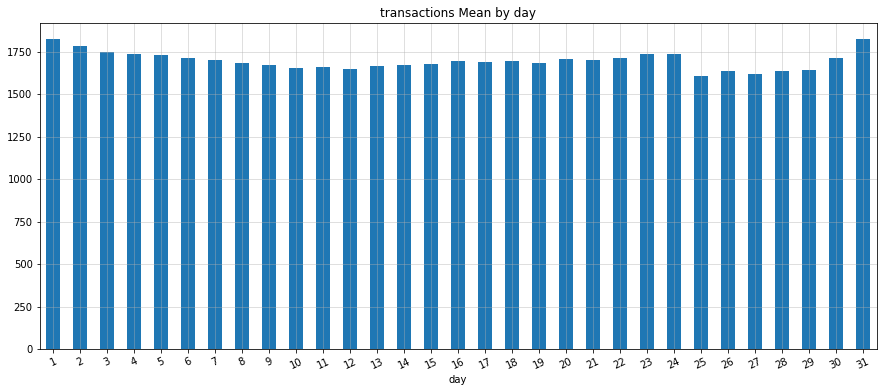

In [ ]:
plt.figure(figsize=(15,6))
transactions.groupby('day').transactions.mean().plot(kind='bar')
plt.title('transactions Mean by day')
plt.xticks(rotation=25)
plt.grid(True, alpha=0.5)
plt.show()

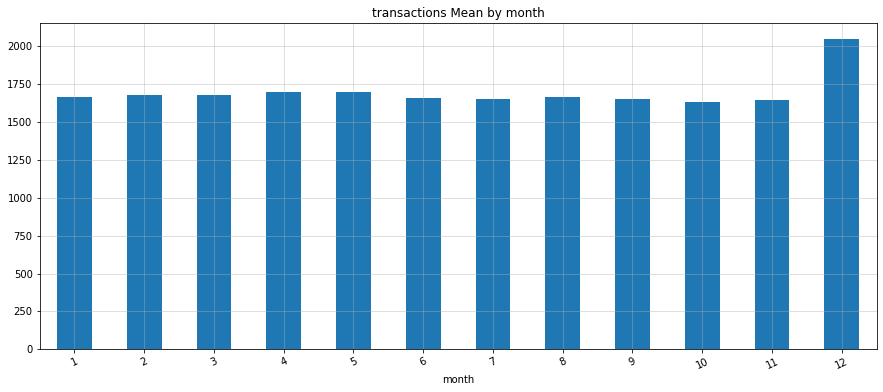

In [ ]:
plt.figure(figsize=(15,6))
transactions.groupby('month').transactions.mean().plot(kind='bar')
plt.title('transactions Mean by month')
plt.xticks(rotation=25)
plt.grid(True, alpha=0.5)
plt.show()